![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

# Parte 1: Erros de interpolação

## Questão 1: Polinômios de grau 2

Seja $f$ uma função e $P$ o polinômio interpolador de grau 2 determinado por
$f(a)$, $f(0)$ e $f(-a)$.

Escreva uma função que, dados $f$ e $a$, retorna os coeficientes de $P$,
do menor ao maior grau.

In [2]:
def coefs_grau2(f, a):
    
    ys = [f(a), f(0), f(-a)]
    xs = [a, 0, -a]
    M = []
    for x in xs:
        linha = [1, x, x**2]
        M.append(linha)

    return np.linalg.solve(M,ys)
    

In [3]:
def f1(x): return x**2
c1 = coefs_grau2(f1, 1)
assert np.allclose(c1, [0,0,1], atol=1e-12, rtol=1e-12)

In [4]:
def f1(x): return x**2
c1 = coefs_grau2(f1, 0.5)
assert np.allclose(c1, [0,0,1], atol=1e-12, rtol=1e-12)

In [5]:
c_sin = coefs_grau2(np.sin, 1)

In [6]:
c_sin = coefs_grau2(np.sin, 1)
assert np.allclose(c_sin, [0,np.sin(1),0], atol=1e-12, rtol=1e-12)

c_sin = coefs_grau2(np.sin, 0.7)
assert np.allclose(c_sin, [0,np.sin(0.7)/0.7,0], atol=1e-12, rtol=1e-12)

Explique porque é tão fácil calcular os coeficientes do polinômio para o seno. (sem resolver o sistema linear!)

Como a função seno é "simetrica", temos que f(a) = - f(-a). Ou seja, precisamos realizar menos cálculos, e essa simetria faz com que o primeiro e terceiro coeficiente sejam iguais a 0, e assim precisamos calcular apenas o segundo coeficiente.

E porque os coeficientes para `f1` não mudaram?

Pois como estamos tratando de um polinômio de grau 2, não importa os valore que escolhemos, o polinômio interpolador sempre será o mesmo para o grau 2.

In [7]:
c_exp = coefs_grau2(np.exp, 1)
assert np.allclose(c_exp, [1, 1.17520119, 0.54308063])

c_exp = coefs_grau2(np.exp, 0.5)
assert np.allclose(c_exp, [1, 1.04219061, 0.51050386])

## Questão 2: Erros

Seja $f$ uma função e $P$ o seu polinômio interpolador, dado por seus coeficientes.

Escreva uma função que, dados `f`, `coefs` e um `ndarray` `ts`, calcula o vetor dos erros (com sinal)
entre $f$ e $P$ ao longo dos pontos em `ts`.

Dica: use `np.polyval` (e leia a ajuda)

In [8]:
def erros(f, coefs, ts):
    if type(coefs) == list:
        coefs.reverse()
    else:
        coefs = np.flip(coefs)
    valores = np.array([np.polyval(coefs,t) for t in ts])
    ys = np.array([f(t) for t in ts])
    return ys - valores

In [9]:
err_exp = erros(np.exp, [1, 1, 1/2], [0, 1, -1])
assert np.allclose(err_exp, [ 0.        ,  0.21828183, -0.13212056])

In [10]:
err_exp = erros(np.exp, [1, 1, 1/2], [0, 1/2, -1/2])
assert np.allclose(err_exp, [ 0.        ,  0.02372127, -0.01846934])

In [11]:
err_sin = erros(np.sin, [0, 1, 0], [0,1,2,3,np.pi])
assert np.allclose(err_sin, [ 0.        , -0.15852902, -1.09070257, -2.85887999, -3.14159265])

## Questão 3: Gráficos de erros

Faça, para a função seno, o gráfico dos erros para 100 pontos no intervalo $[-1,1]$,
correspondente aos polinômios interpoladores de grau 2, ao variar $a$ de $0.1$ até $1.0$.

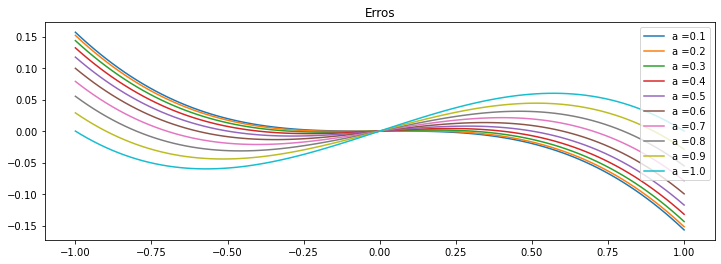

In [12]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

for a in np.linspace(0.1,1,10):
    erro = erros(np.sin, coefs_grau2(np.sin, a), np.linspace(-1,1,100))
    plt.plot(np.linspace(-1,1,100),erro, label = 'a =' + str(round(a,1)) )
plt.title('Erros')
plt.legend()

In [13]:
assert len(ax.lines) >= 10
assert len(ax.get_legend().texts) >= 10

## Questão 4: Estatísticas dos erros

Qual a soma dos erros, para cada valor de $a$?

Imprima uma tabela com os valores de $a$ e o valor da soma, usando `print()` formatado.

In [14]:
for a in np.linspace(0.1,1,10):
    erro = erros(np.sin, coefs_grau2(np.sin, a), np.linspace(-1,1,100))
    print('Erro de ' + str(round(a,1)) + ' igual a:')
    print(np.sum(erro))
    print()
    


Erro de 0.1 igual a:
-1.2212453270876722e-15

Erro de 0.2 igual a:
-1.2212453270876722e-15

Erro de 0.3 igual a:
-1.1102230246251565e-15

Erro de 0.4 igual a:
-9.43689570931383e-16

Erro de 0.5 igual a:
-9.43689570931383e-16

Erro de 0.6 igual a:
-7.771561172376096e-16

Erro de 0.7 igual a:
-6.106226635438361e-16

Erro de 0.8 igual a:
-2.220446049250313e-16

Erro de 0.9 igual a:
-4.163336342344337e-16

Erro de 1.0 igual a:
5.551115123125783e-17



Agora, faça uma tabela com a soma dos valores **absolutos** dos erros, para cada valor de $a$.

In [15]:
for a in np.linspace(0.1,1,10):
    erro = erros(np.sin, coefs_grau2(np.sin, a), np.linspace(-1,1,100))
    print('Erro de ' + str(round(a,1)) + ' igual a:')
    print(np.sum(abs(erro)))
    print()
    

Erro de 0.1 igual a:
4.066713333575328

Erro de 0.2 igual a:
3.827205383020329

Erro de 0.3 igual a:
3.4623822338515478

Erro de 0.4 igual a:
3.0230794495150053

Erro de 0.5 igual a:
2.5790783372348267

Erro de 0.6 igual a:
2.2177422809191114

Erro de 0.7 igual a:
2.0422985340893396

Erro de 0.8 igual a:
2.1697911395520366

Erro de 0.9 igual a:
2.728735642099987

Erro de 1.0 igual a:
3.8565108513854467



Enfim, uma tabela para o maior erro (em valor absoluto), dentre os 100 pontos, para cada valor de $a$.

In [16]:
for a in np.linspace(0.1,1,10):
    erro = erros(np.sin, coefs_grau2(np.sin, a), np.linspace(-1,1,100))
    print('Erro de ' + str(round(a,1)) + ' igual a:')
    print(np.max(abs(erro)))
    print()
    

Erro de 0.1 igual a:
0.15686318166038504

Erro de 0.2 igual a:
0.15187566916740958

Erro de 0.3 igual a:
0.14359637072990206

Erro de 0.4 igual a:
0.13207487096372972

Erro de 0.5 igual a:
0.1173800924005095

Erro de 0.6 igual a:
0.09959980418382919

Erro de 0.7 igual a:
0.07883999696023358

Erro de 0.8 igual a:
0.05522412881650696

Erro de 0.9 igual a:
0.04429776774515015

Erro de 1.0 igual a:
0.05998709202465069



## Questão 5: Gráficos das estatísticas

Crie um dicionário que associa, a cada valor de $a$ abaixo,
o `array` dos erros nos 100 pontos do intervalo $[-1,1]$.

In [17]:
dicionario = {}
lista_a = np.linspace(0.1, 1.0, num=91)

for a in lista_a:
     
    erro = erros(np.sin, coefs_grau2(np.sin, a), np.linspace(-1,1,100))
    dicionario[a] = erro


Agora, faça, num mesmo eixo, os gráficos dos 3 erros, em função de $a$.

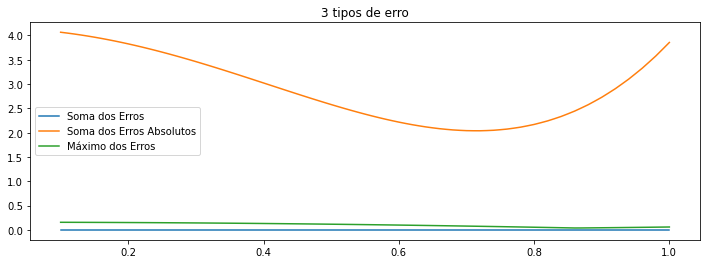

In [18]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

soma = [np.sum(er) for er in dicionario.values()]
soma_abs = [np.sum(abs(er)) for er in dicionario.values()]
maximo = [np.max(er) for er in dicionario.values()]

plt.title("3 tipos de erro")
plt.plot(dicionario.keys(), soma, label="Soma dos Erros")
plt.plot(dicionario.keys(), soma_abs, label="Soma dos Erros Absolutos")
plt.plot(dicionario.keys(), maximo, label="Máximo dos Erros")
plt.legend()

In [19]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

O gráfico acima tem 2 problemas:
- A soma dos erros é sempre muito pequena
- A soma dos valores absolutos dos erros é bem maior do que o maior erro.

Explique porque eles acontecem.

Isto acontece pois o erros estão se cancelando na soma, isso faz com a soma dos valores absolutos seja muito maior que a soma dos erros. Pois eles se acrescentam e não se cancelam.

Para comparar melhor a soma dos erros absolutos com o maior erro no intervalo $[-1,1]$,
poderíamos normalizar a soma (por exemplo, dividindo pelo número de termos).

Mas também podemos usar dois eixos separados, com um `subplot`.
Refaça os gráficos, para estes dois critérios de erro.

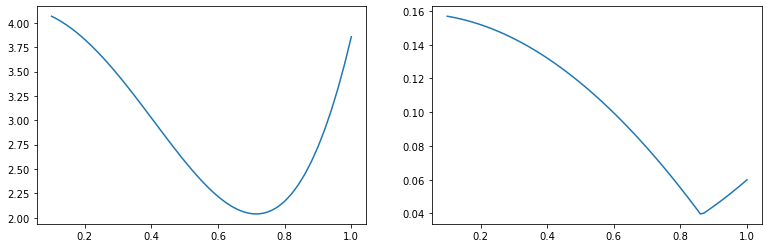

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4))

soma_abs_norm = [np.sum(abs(erro1))/len(erro1) for erro1 in dicionario.values()]
maximo = [np.max(erro2) for erro2 in dicionario.values()]


axs[0].plot(dicionario.keys(), soma_abs)
axs[1].plot(dicionario.keys(), maximo)

O gráfico do erro da soma parece ser suave, enquanto o gráfico para o máximo do erro, não.
Porque você acha que isso acontece?

YOUR ANSWER HERE

## Questão 6: E a exponencial?

Refaça a figura com o comportamento dos **três** erros (em eixos separados) para a exponencial.

NotImplementedError: 

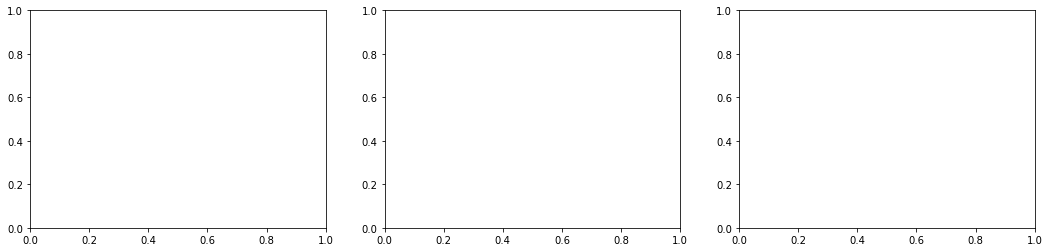

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))

# YOUR CODE HERE
raise NotImplementedError()

O que você deduz destes gráficos?

YOUR ANSWER HERE

## Questão 7: Uma integral

Calcule o erro entre
1. a integral do polinômio interpolador $P_a$ em $[-1,1]$, e
2. a integral da exponencial no mesmo intervalo.

Faça um gráfico em função de $a$.

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(6,4))

# YOUR CODE HERE
raise NotImplementedError()

Esse gráfico se parece com algum dos anteriores? Qual? Porque você acha que isso acontece?

YOUR ANSWER HERE

# Autovalores de matrizes simétricas

Vimos em sala que matrizes simétricas têm autovalores ortogonais.

Vamos usar esta propriedade para estender o método da potência para encontrar os 2 maiores autovalores,
com seus autovetores correspondentes.

## Questão 8: Iteração de potência

Dê abaixo o método de iteração de potência para uma matriz $A$, começando com o vetor $u_0$.

Use como critério de parada a distância (relativa) entre $Au_k$ e $\lambda_k u_k$,
onde $\lambda_k$ é a estimativa atual do autovalor.

Retorne todos os vetores $u_k$ produzidos (e normalizados), assim como os $\lambda_k$.

In [ ]:
def iteracao_potencia(A, u0, tol=1e-6, maxiter=100):
    A = np.asarray(A)
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    vetor=u0
    vetor /= norm(vetor) 
    vs = [] 
    ls = []

    iter = 0
    while( iter<=maxiter ):
      vetor = A@vetor
      vetor /= norm(vetor)
      l = np.dot(vetor, A@vetor)
      err = norm((A@vetor)- l*vetor) 

      ls.append(l)
      vs.append(vetor)

      iter+=1
      if (err <= tol):
        return (vs, ls)
    return (vs, ls)

In [ ]:
A = [[0,1],[2,1]]
us, ls = iteracao_potencia(A, [1.0,0])

assert 10 < len(ls) < 30

In [ ]:
A = [[0,1],[2,1]]
us, ls = iteracao_potencia(A, [1.0,0])

assert np.isclose(ls[-1], 2)
assert np.allclose(us[-1], [0.44721385, 0.89442706], atol=1e-6)
assert np.allclose(us[-5], [0.44721385, 0.89442706], atol=1e-6)

Vimos acima que `us[-1]` e `us[-5]` estão próximos do mesmo vetor, com tolerância `1e-6`.
Ora, a tolerância de parada é `1e-6`.

O que você acha que fez a função continuar iterando?

Pois fazendo a normalização do erro relativo, podemos perceber que os autovalores dos pontos serão diferentes, porém seus autovetores serão iguais. Isso fará com que o algoritmo continue iterando por nçao atingir a tolerância.

In [ ]:
A = [[0,1,2],[3,2,1],[1,2,4]]
us, ls = iteracao_potencia(A, [1.0,1,1])

assert 5.7 < ls[-1] < 5.8
assert 5 < len(ls) < 15

## Dois autovetores

Vamos adaptar o método anterior para calcular dois autovetores.
O algoritmo é o seguinte:
1. Comece com dois vetores $u_0$ e $v_0$, com $v_0$ ortogonal a $u_0$ (ou seja, $u_0 \cdot v_0 = 0$);
2. Seja $k = 0$;
3. Calcule $u_{k+1} = \frac{A u_k}{\| A u_k \|}$ como na iteração de potência;
4. Calcule $w = A v_k$, e retire a componente de $w$ na direção de $u_{k+1}$, para que $\hat{w} \cdot u_{k+1} = 0$
5. Normalize $\hat{w}$ para definir $v_{k+1}$
6. Calcule os produtos de Rayleigh $u_{k+1} \cdot u_k$ e $v_{k+1} \cdot v_k$, para estimar os autovalores;
7. Teste a convergência tanto de $u_{k+1}$ como de $v_{k+1}$
    * Se convergiu, retorne
    * Senão, faça $k = k+1$ e volte para 3.

## Questão 9: Projeção ortogonal

A primeira etapa que falta programar é retirar a componente de $w$ na direção de $u$.
Escreva esta função.

In [ ]:
def retirar_componente(w,u):
    w = np.asarray(w)
    u = np.asarray(u)
    assert np.isclose(norm(u), 1) # Para facilitar
    return w - (np.dot(w,u)/norm(u))*u
    

In [ ]:
v = retirar_componente([1,2], [0,1])
assert np.allclose(v, [1,0])

In [ ]:
v = retirar_componente([1,2,3,4], [0,0,1,0])
assert np.allclose(v, [1,2,0,4])

In [ ]:
v = retirar_componente([1,2,3,4], [1/2,1/2,1/2,1/2])
assert np.allclose(v, [-3/2,-1/2,1/2,3/2])

Dê, na caixa abaixo, mais dois testes para sua função `retirar_componente`.

In [ ]:
a = retirar_componente([4,7], [0,1])
assert np.allclose(a, [4,0])

b = retirar_componente([3,2,2,1], [0,1,0,0])
assert np.allclose(b, [3,0,2,1])

## Questão 10: A iteração dupla

Agora, complete a iteração dupla da potência, retornando:
- Os candidatos ao "maior" autovetor
- Os candidatos ao maior autovalor
- Os candidatos ao "segundo" autovetor
- Os candidatos ao segundo autovalor.

(Ou seja, os dois primeiros são exatamente como na iteração de potência)

O algoritmo só pode convergir se **ambos** os vetores estiverem próximos dos autovetores correspondentes!

In [ ]:
def iteracao_potencia2(A, u0, v0, tol=1e-6, maxiter=100):
    A = np.asarray(A)
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    for i in range(maxiter):
        u = (A@u0)/norm(A@u0)
        w1 = A@v0
        w2 = retirar_componente(w1,u)
        v = w2/norm(w2)
        
        x1 = np.dot(u,u0)
        x2 = np.dot(u, v0)
        
        v0,u0 = v,u

In [ ]:
A = [[0,1],[1,2]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])

assert 5 < len(ls) < 20

In [ ]:
A = [[0,1],[1,2]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])

assert np.isclose(ms[-1], 1-np.sqrt(2))

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,5]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0,0], [1.0,1,0])

assert 4 <= len(ls) <= 15

Como você faria para verificar que os vetores retornados acima de fato estão próximos dos autovetores de $A$?

Explique na caixa abaixo a sua ideia, e depois faça as contas.

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Questão 11: Gráficos

Faça o gráfico da evolução dos dois maiores autovalores, para a matriz `A` abaixo.

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,5]]

fig, ax = plt.subplots(ncols=1)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [ ]:
assert len(ax.get_title()) > 0
assert len(ax.get_xlabel()) > 0

Agora, faça o gráfico do erro (absoluto) ao longo das iterações

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,5]]

fig, ax = plt.subplots(ncols=1)
# YOUR CODE HERE
raise NotImplementedError()

Os erros continuam decaindo exponencialmente rápido para o segundo autovalor?

YOUR ANSWER HERE

Repita o gráfico dos erros (absolutos) para uma matriz ligeiramente diferente:

In [ ]:
A = [[1,0,0],[0,2,0],[0,0,3]]
ev = np.linalg.eigvals(A)
ev[1:]/ev[:-1]

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,6]]

fig, ax = plt.subplots(ncols=1)
# YOUR CODE HERE
raise NotImplementedError()

O que você percebe de diferente para a convergência?

YOUR ANSWER HERE

Isto depende de quais vetores iniciais foram escolhidos para a iteração?

Faça gráficos abaixo, e comente em seguida.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## Um último caso

Vejamos o que o algorito faz no caso de uma matriz que não é simétrica.
O que aconteceu na caixa a seguir?

In [ ]:
A = [[0,1],[2,1]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])
print(ls)
print(ms)

YOUR ANSWER HERE